In [1]:
#Libraries

import math
import cmath
import numpy as np
import scipy.io as sio
from scipy.fft import fft, fftfreq
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time
from scipy.integrate import quad
from scipy.signal import find_peaks
from scipy import signal
from pysdr import filter_design

ImportError: cannot import name 'Figure' from 'bokeh.plotting' (c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\bokeh\plotting\__init__.py)

# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [ ]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n >= 0:
        return 1
    else:
        return 0
    
def ret(t):
    if abs(t) > (1/2):
        return 0
    elif abs(t) == (1/2):
        return (1/2)
    elif abs(t) < (1/2):
        return 1

def convolucao(h, x):
    y = []
    for i in range(len(h) + len(x)):
        elemento = 0
        for j in range(len(h) + len(x)):
            if i - j >= 0:
                if (j > (len(h)-1)) and ((i - j) > (len(x)-1)):
                    elemento += 0 * 0
                elif j > (len(h)-1):
                    elemento += 0 * x[i - j]
                elif (i - j) > (len(x)-1):
                    elemento += h[j] * 0
                else:
                    elemento += h[j] * x[i - j]
        y.append(elemento) 
    return y

def filtro(x, Fcorte):
    k = 1
    a = 0.9
    cos = 2*math.cos((Fcorte)*math.pi)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (2*k*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) + (2*k*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

Grafico de X[k]


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


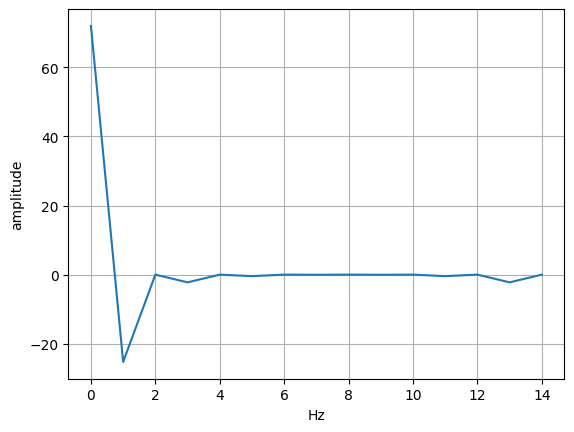

In [ ]:
def xDFT(w):
    x = [1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1]
    resposta = 0
    for i in range(len(x)):
        resposta += x[i]*np.exp((-2j * np.pi * w * i )/ len(x))
    return resposta

holder2 = []

for t in np.arange(0, 15):
    holder2.append(xDFT(t))

print("Grafico de X[k]")
plt.plot(holder2)
plt.xlabel("Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

Grafico de X[k]


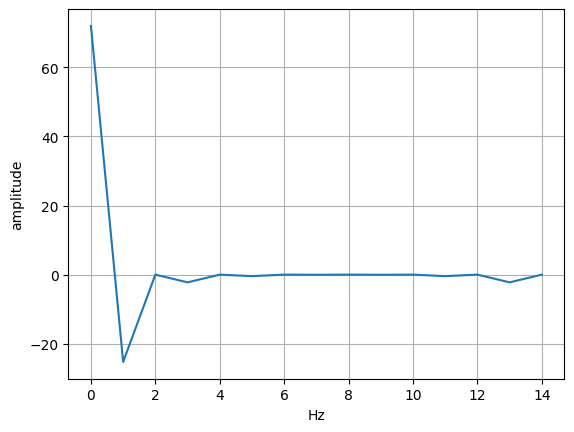

Grafico de Xe[k] + Xo[k]*W^k


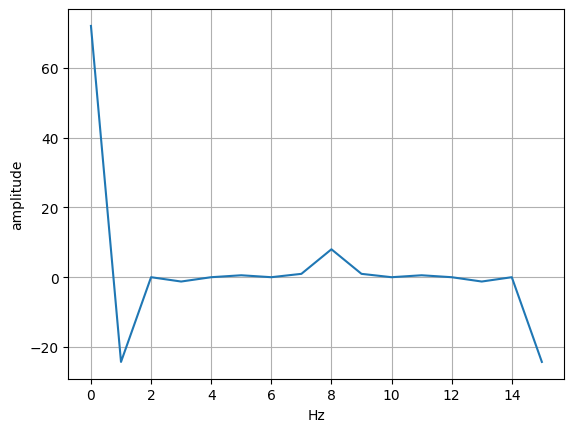

MAE: 1.6851024926306852


In [ ]:
def Xe(w):
    x = [2, 4, 6, 8, 8, 6, 4, 2]
    resposta = 0
    for i in range(len(x)):
        resposta += x[i]*np.exp((-2j * np.pi * w * i )/ len(x))
    return resposta

def Xo(w):
    x = [1, 3, 5, 7, 7, 5, 3, 1]
    resposta = 0
    for i in range(len(x)):
        resposta += x[i]*np.exp((-2j * np.pi * w * i )/ len(x))
    return resposta

X = []

for k in range(8):
    W = np.exp((-2j * np.pi * k )/ 16)
    resposta = Xe(k) + (W*Xo(k))
    X.append(resposta)
for i in range(8):
    W = np.exp((-2j * np.pi * i )/ 16)
    resposta = Xe(i) - (W*Xo(i))
    X.append(resposta)

print("Grafico de X[k]")
plt.plot(holder2)
plt.xlabel("Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

print("Grafico de Xe[k] + Xo[k]*W^k")
plt.plot(X)
plt.xlabel("Hz")
plt.ylabel("amplitude")
plt.grid()
plt.show()

def MAE(sinal1, sinal2):
    resposta = 0
    N = len(sinal1)
    for i in range(N):
        resposta += np.abs(sinal1[i] - sinal2[i])/N
    return resposta

print(f"MAE: {MAE(holder2, X)}")

# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

In [ ]:
Fcorte = 5
Famostragem = 200

taps = signal.firwin(3, Fcorte, fs=Famostragem)
filter_design.plot_freqz(3, whole=True)



## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

In [ ]:
#Resposta da questão 2b

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


In [ ]:
#Resposta da questão 2c

sinal = np.loadtxt("potencia.txt")

## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

In [ ]:
#Resposta da questão 2d

# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

In [ ]:
#Resposta da questão 3a

## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

In [ ]:
#Resposta da questão 3b

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

In [ ]:
#Resposta da questão 3c

sinal = sp.io.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

In [ ]:
#Resposta da questão 3d